In [ ]:
# Fastbook + relevant packages installation
! [ -e /content ] && pip install -Uqq fastbook kaggle

# Import the modules
from fastai.vision.all import *
import fastbook
# Setup the book
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 90.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Create a kaggle folder
!mkdir ~/.kaggle
# Copy json file into the kaggle folder
!cp /content/gdrive/MyDrive/YouTube/kaggle.json ~/.kaggle/
# Give full read & write permission only to the owner
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Declare the dataset name
name = "digit-recognizer"
# Declare the dataset path
path = URLs.path(url=name); path

Path('/root/.fastai/archive/digit-recognizer')

In [ ]:
# Import the modules
from kaggle import api

# If the path does not exist
if not path.exists():
    # Create it
    path.mkdir(parents=True)
    # Download the dataset to the set path
    api.competition_download_cli(competition=name, path=path)
    # Unzip the file
    shutil.unpack_archive(str(path/f"{name}.zip"), str(path))

# Trace
path.ls(file_type="text")

100%|██████████| 15.3M/15.3M [00:01<00:00, 14.2MB/s]


(#3) [Path('/root/.fastai/archive/digit-recognizer/sample_submission.csv'),Path('/root/.fastai/archive/digit-recognizer/test.csv'),Path('/root/.fastai/archive/digit-recognizer/train.csv')]

In [ ]:
# Create folders in label name [0, ..., 9]
for i in range(10):
    # For training folder
    (path/"training"/str(i)).mkdir(exist_ok=True, parents=True)

# For testing folder
(path/"testing"/"None").mkdir(exist_ok=True, parents=True)
# Trace
(path/"training").ls(), (path/"testing").ls()

((#10) [Path('/root/.fastai/archive/digit-recognizer/training/8'),Path('/root/.fastai/archive/digit-recognizer/training/1'),Path('/root/.fastai/archive/digit-recognizer/training/9'),Path('/root/.fastai/archive/digit-recognizer/training/4'),Path('/root/.fastai/archive/digit-recognizer/training/3'),Path('/root/.fastai/archive/digit-recognizer/training/7'),Path('/root/.fastai/archive/digit-recognizer/training/5'),Path('/root/.fastai/archive/digit-recognizer/training/0'),Path('/root/.fastai/archive/digit-recognizer/training/6'),Path('/root/.fastai/archive/digit-recognizer/training/2')],
 (#1) [Path('/root/.fastai/archive/digit-recognizer/testing/None')])

In [ ]:
# Load the train data
train_df = pd.read_csv(path/"train.csv", low_memory=False); train_df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [ ]:
# Look at an image
img = train_df.iloc[0, 1:].values.reshape(28, 28).astype(np.uint8)
img = Image.fromarray(obj=img)
PILImageBW.create(fn=img)

In [ ]:
# Save
img.save("/content/img.png")

In [ ]:
def save_images(df: pd.DataFrame, folder_name: str):
    """The save_images function takes in two arguments, a Pandas DataFrame df and a string folder_name.
    It iterates through the rows of the DataFrame and saves each row as a PNG image in the corresponding folder.
    If folder_name is "training", it retrieves the label from the first column of the row and
    saves the image in a subfolder of the "training" folder with the same name as the label.
    If folder_name is not "training", it saves the image in a subfolder of the "testing" folder called "None".
    The function converts the values of each row into a NumPy array, reshapes it into a 28x28 matrix,
    and then converts it into a PIL Image object before saving it as a PNG file.

    Args:
        df (pd.DataFrame): The DataFrame containing the image data to be saved as PNG images.
        folder_name (str): The name of the folder where the images will be saved. If it is "training",
                           the images will be saved in the "training" folder with a subfolder for each label.
                           If it is not "training", the images will be saved in the "testing" folder
                           with a subfolder called "None".

    Returns:
        None.    
    """
    # Declare whether it is training
    is_training = True if folder_name == "training" else False
    # Iterate through the frame rows
    for i, row in df.iterrows():
        # If it is training
        if is_training:
            # Retrieve the label as well
            label, digit = row[0], row[1:]
            # Declare the filepath
            fp = path/"training"/f"{str(label)}/{str(i)}.png"
        # Else
        else:
            # Only digits
            digit = row
            # Declare the filepath
            fp = path/"testing"/f"None/{str(i)}.png"
        # Change the format of values
        img = digit.values.reshape(28, 28).astype(np.uint8)
        # Convert it as PILImage object
        img = Image.fromarray(obj=img)
        # Save it to belonging folder
        img.save(fp=fp)


# Test the function with training images
save_images(df=train_df, folder_name="training")
# Trace the results
(path/"training"/"0").ls()[:3]

(#3) [Path('/root/.fastai/archive/digit-recognizer/training/0/10095.png'),Path('/root/.fastai/archive/digit-recognizer/training/0/37143.png'),Path('/root/.fastai/archive/digit-recognizer/training/0/19512.png')]

In [ ]:
# Visualize one of the saved images
PILImageBW.create(fn=(path/"training"/"0").ls()[2000])

In [ ]:
# Declare a DataBlock object
db = DataBlock(blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
               get_items=get_image_files,
               splitter=TrainTestSplitter(random_state=43),
               get_y=parent_label)

In [ ]:
# Create the DataLoader object
dls = db.dataloaders(source=path)

In [ ]:
# Trace the batch size
dls.one_batch()[0].size()

torch.Size([64, 1, 28, 28])

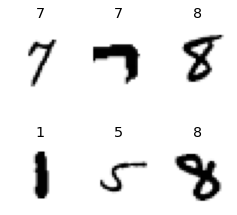

In [ ]:
# Show a batch of 6
dls.show_batch(max_n=6, figsize=(4, 4))

In [ ]:
# Install neptune modules
!pip install -q neptune neptune-fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.8/443.8 KB 15.2 MB/s eta 0:00:00


In [ ]:
# Import the modules
from getpass import getpass

import neptune
from neptune.integrations.fastai import NeptuneCallback
from neptune.types import File

In [ ]:
# Retrieve the api token
api_token = getpass("Enter your private Neptune API token: ")

Enter your private Neptune API token: ··········


In [ ]:
# Project name
workspace = "wai"
project_name = "example"
project = f"{workspace}/{project_name}"
# Trace
print(project)

wai/example


In [ ]:
# Init Neptune environment
run = neptune.init_run(project=project,
                       api_token=api_token,
                       custom_run_id="fastai-mnist",
                       capture_hardware_metrics=True,
                       capture_stderr=True,
                       capture_stdout=True)

https://new-ui.neptune.ai/wai/example/e/EX-3


SuggestedLRs(slide=0.00363078061491251, valley=0.0030199517495930195)

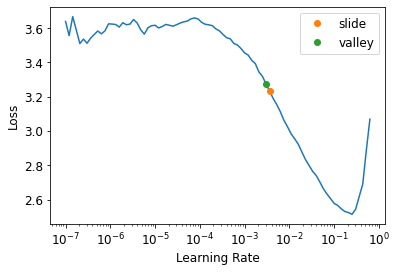

In [ ]:
# Create a ResNet-18 architecture
learn = vision_learner(dls=dls,
                       arch=models.resnet18,
                       metrics=accuracy)
# Find the optimum learning rate
learn.lr_find(suggest_funcs=(slide, valley))

In [ ]:
# Declare Neptune Callback
neptune_callback = NeptuneCallback(run=run)
# Fine tune the model
learn.fine_tune(epochs=25, base_lr=0.003,
                cbs=[SaveModelCallback,
                     ReduceLROnPlateau,
                     EarlyStoppingCallback(patience=5),
                     neptune_callback])

epoch,train_loss,valid_loss,accuracy,time
0,0.826105,0.597228,0.811548,00:53


Better model found at epoch 0 with valid_loss value: 0.5972276926040649.


epoch,train_loss,valid_loss,accuracy,time
0,0.202141,0.127238,0.960714,01:00
1,0.117006,0.079982,0.976310,00:56
2,0.081094,0.076464,0.976905,00:57
3,0.076409,0.069194,0.981191,00:58
4,0.072281,0.055503,0.984286,00:56
5,0.060334,0.064957,0.984643,00:56
6,0.047108,0.047358,0.987857,00:58
7,0.043848,0.046118,0.987024,00:57
8,0.040522,0.046503,0.987976,00:55
9,0.035012,0.045348,0.989405,00:55


Better model found at epoch 0 with valid_loss value: 0.1272384375333786.
Better model found at epoch 1 with valid_loss value: 0.07998170703649521.
Better model found at epoch 2 with valid_loss value: 0.0764637365937233.
Better model found at epoch 3 with valid_loss value: 0.06919416785240173.
Better model found at epoch 4 with valid_loss value: 0.055503372102975845.
Epoch 5: reducing lr to 0.0001385128597447923
Better model found at epoch 6 with valid_loss value: 0.04735777899622917.
Better model found at epoch 7 with valid_loss value: 0.046118445694446564.
Epoch 8: reducing lr to 0.0001473040608852094
Better model found at epoch 9 with valid_loss value: 0.04534783959388733.
Epoch 10: reducing lr to 0.0001356914870866893
Epoch 11: reducing lr to 0.0001268484653889572
Epoch 12: reducing lr to 0.00011633901359357765
Epoch 13: reducing lr to 0.00010450090969510366
Epoch 14: reducing lr to 9.171466605363414e-05
No improvement since epoch 9: early stopping


In [ ]:
# Declare an interpreter
interp = Interpretation.from_learner(learn=learn)

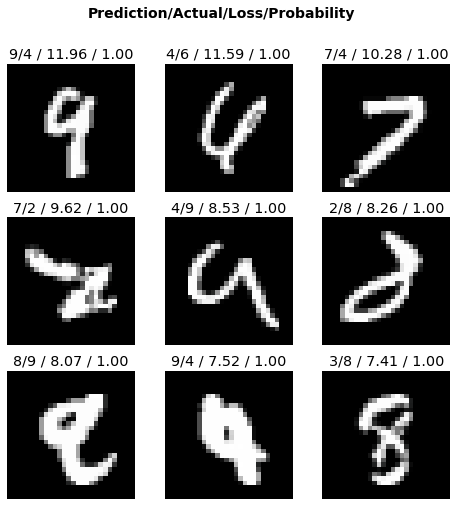

In [ ]:
# Plot top losses
interp.plot_top_losses(k=9, figsize=(8, 8))

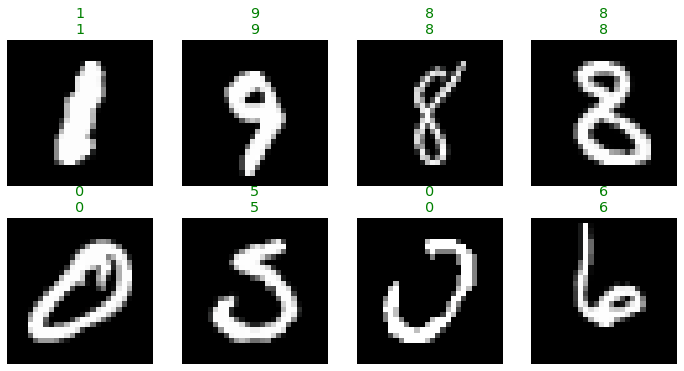

In [ ]:
# Show some results
learn.show_results(max_n=8)

In [ ]:
# Classification interpreter
interp = ClassificationInterpretation.from_learner(learn)

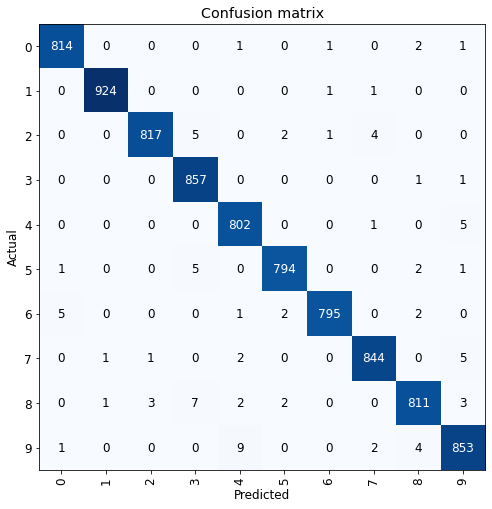

In [ ]:
# Plot the confusion matrix
interp.plot_confusion_matrix(figsize=(7,7))

In [ ]:
# Most confused ones from the confusion matrix [actual, predicted, # occurrences]
mc = pd.DataFrame(data=interp.most_confused(min_val=5),
                  columns=["actual", "predicted", "# occurences"])

In [ ]:
# Confusion matrix
cm = interp.confusion_matrix()

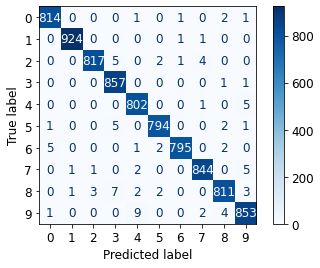

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Declare Confusion Matrix Display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=range(10))
# Plot
disp.plot(cmap=plt.cm.Blues)
# Save
disp.figure_.savefig(fname="/content/cm.png", dpi=800)

In [ ]:
# Uploads

# Confusion matrix
run["confusion_matrix"].upload(value=File(path="/content/cm.png"))

In [ ]:
# Most confused examples
run["most_confused"].upload(File.as_html(chart=mc))

In [ ]:
# Top Losses with images
losses, idxs, paths = interp.top_losses(k=9, items=True)

# Iterate through the examples
for loss, idx, p in zip(losses, idxs, paths):
    # Predict
    y_pred = learn.predict(p)[0]
    # Actual value
    y_true = parent_label(o=p)
    run["misclassified_imgs"].append(
        value=File(path=str(p)),
        description=f"Prediction: {y_pred}\nActual: {y_true}\nLoss: {loss}",
    )

In [ ]:
# Remove Neptune cb
learn.remove_cb(neptune_callback)
# Upload the model
run["model/fastai-resnet18-mnist"].upload(File.as_pickle(obj=learn))

In [ ]:
# Stop the session
run.stop()

Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 4 operations to synchronize with Neptune. Do not kill this process.
All 4 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://new-ui.neptune.ai/wai/example/e/EX-3/metadata


In [ ]:
# Save the model
learn.save(file="/content/gdrive/MyDrive/YouTube/mLPlaylist/video-4-kaggle-mnist-fastai")

Path('/content/gdrive/MyDrive/YouTube/mLPlaylist/video-4-kaggle-mnist-fastai.pth')

In [ ]:
# Declare an empty ResNet-18
learn1 = vision_learner(dls=dls, arch=resnet18)
# Load the params from the previous training
learn1 = learn1.load("/content/gdrive/MyDrive/YouTube/mLPlaylist/video-4-kaggle-mnist-fastai")

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

# Testing & Kaggle Upload

In [ ]:
# Save test images
save_images(df=pd.read_csv(path/"test.csv", low_memory=False),
            folder_name="testing")
# Trace the results
test_files = [path/f"testing/None/{i}.png" for i in range(28000)]; test_files[:5]

[Path('/root/.fastai/archive/digit-recognizer/testing/None/0.png'),
 Path('/root/.fastai/archive/digit-recognizer/testing/None/1.png'),
 Path('/root/.fastai/archive/digit-recognizer/testing/None/2.png'),
 Path('/root/.fastai/archive/digit-recognizer/testing/None/3.png'),
 Path('/root/.fastai/archive/digit-recognizer/testing/None/4.png')]

In [ ]:
# Construct the DataLoader
test_dls = learn.dls.test_dl(test_items=test_files, shuffle=False)

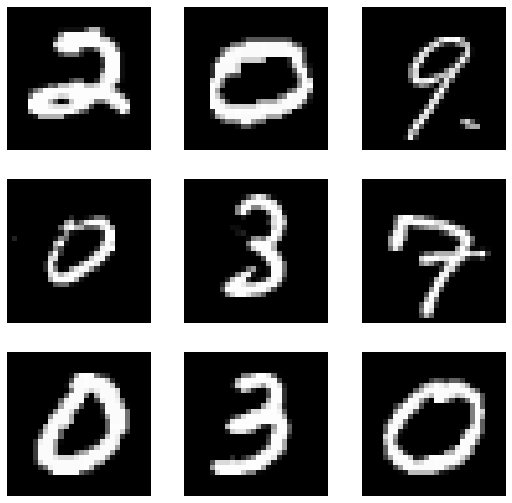

In [ ]:
test_dls.show_batch()

In [ ]:
# Predictions
preds = learn.get_preds(dl=test_dls)
# Trace results
np.argmax(preds[0], axis=-1).numpy()[:5]

array([2, 0, 9, 0, 3])

In [ ]:
submission = pd.read_csv(path/"sample_submission.csv")
submission["Label"] = np.argmax(preds[0], axis=-1).numpy()
# Trace the results
submission.head(n=5)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [ ]:
submission.to_csv("kaggle-mnist-resnet18-submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c digit-recognizer -f /content/kaggle-mnist-resnet18-submission.csv -m kaggle-mnist-resnet18-submission-test

100% 208k/208k [00:00<00:00, 284kB/s]
Successfully submitted to Digit Recognizer